# Lab 8 - Cluster Analysis with R - priorities_perifereiwn

In [1]:
# read the .csv and transpose it! (colnames,rownames are not transposed!!)
data <- t(read.csv("Lab8_priorities_perifereion.csv", row.names = 1,header=TRUE))

data

,Sindesi Ereunas & Epixeirimatikotitas,Anaptixi aristeias ston tomea E&K,Ipiresies ilektronikou emporiou,Ilektrinikes ipiresies se koinonikes efarmoges,Epixeirimatika Fitoria,Epixeirimatiki ekpaideusi & xrimatodotisi,"Anaptixi epixeirisewn se perifereiakes, ethnikes kai diethneis agores & symmetoxi autwn se diadikasies kainotomias",Draseis veltiosis energeiakis apodosis,Exipni diaxeirisi energeias,Anaptixi kai xrisi APE,...,Ypodomes ygeias & anapsixis,Anazwogonisi upovathmismenwn koinotitwn entos astikwn kai agrotikwn perioxwn,Paroxi sthrixis gia koinwnikes epixeiriseis,Pragmatopoihsi ependisewn sto plaisio strathgikwn topikis anaptyxis,Draseis gia enisxisi ths apasxolisis,Poma,Anagkes eupathwn omadwn,Prosvasi se koinwnikes ipiresies,Anagkes topikwn koinothtwn,Dia viou mathisi & Eppagelmatiki katartisi & ypodomes
KRITI,1,0,1,1,1,1,0,1,1,1,...,1,0,0,0,1,1,1,1,1,1
ANATOLIKI.MAKEDONIA.THRAKI,1,0,0,1,1,0,1,1,1,1,...,1,0,0,0,1,1,1,1,0,1
ATTIKI,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,0,1
VOREIO.AIGAIO,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,0,1
DYTIKI.ELLADA,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
DYTIKI.MAKEDONIA,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,0,1,1,0,1
IPIROS,1,1,1,1,1,1,0,1,1,1,...,1,1,0,0,1,1,1,1,1,1
THESSALIA,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IONIA.NISIA,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,1,1,1,1,1,1
KENTRIKI.MAKEDONIA,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,1


In [2]:
# Calculate the dissimilarity between observations using the Euclidean distance
dist.l<-dist(data,method="euclidean")

### Complete Linkage Method

In complete-linkage method, we consider the distance between one cluster and another cluster to be equal to the **greatest** distance from any member of one cluster to any member of the other cluster.

-4,-10
-3,-5
-1,-9
-8,1
-6,-11
-12,3
-2,5
2,4
-7,-13
6,8
7,9


[1] "Note that the minus in front of the unit number indicates that this is a single observation being merged;\nwhereas numbers alone indicate the step at which the considered clusters were built."


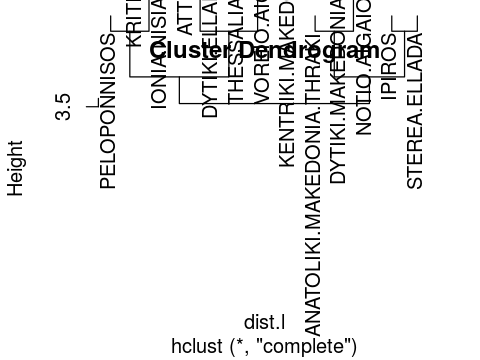

In [3]:
# Compute a hierarchical cluster analysis on the distance matrix using complete linkage method
h_complete<-hclust(dist.l, method="complete")

# In order to see all the steps of the clustering type:
h_complete$merge

print("Note that the minus in front of the unit number indicates that this is a single observation being merged;
whereas numbers alone indicate the step at which the considered clusters were built.")

# Create a plot of the clustering tree
plot(h_complete,labels=rownames(data)) # 'plclust' is deprecated

### Single Linkage Method

In single-linkage clustering, we consider the distance between one cluster and another cluster to be equal to the **shortest** distance from any member of one cluster to any member of the other cluster. 

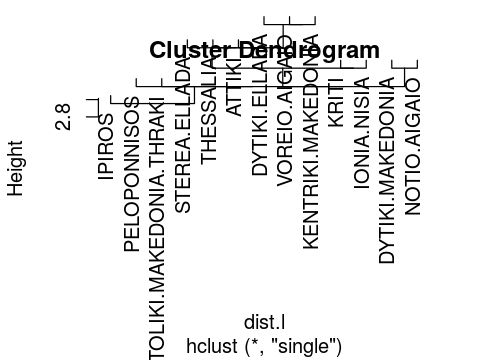

In [14]:
# Compute a hierarchical cluster analysis on the distance matrix using single linkage method
h_single<-hclust(dist.l, method="single")

# In order to see all the steps of the clustering type:
#h_single$merge

#print("Note that the minus in front of the unit number indicates that this is a single observation being merged;
#whereas numbers alone indicate the step at which the considered clusters were built.")

# Create a plot of the clustering tree
plot(h_single)#labels=rownames(data)) # 'plclust' is deprecated

### Average Linkage Method

In average linkage method,we consider the distance between one cluster and another cluster to be equal to the **average** distance from any member of one cluster to any member of the other cluster

-4,-10
-3,-5
1,2
-1,-9
-6,-11
-8,3
-12,4
-2,5
-13,6
7,9
-7,8


[1] "Note that the minus in front of the unit number indicates that this is a single observation being merged;\nwhereas numbers alone indicate the step at which the considered clusters were built."


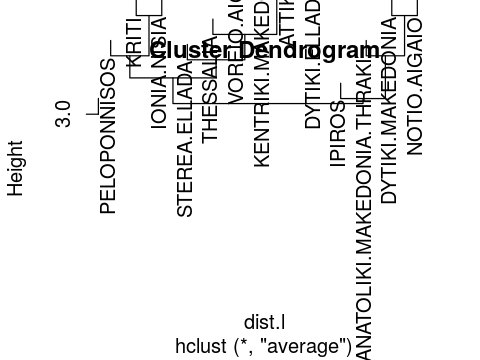

In [5]:
# Compute a hierarchical cluster analysis on the distance matrix using average linkage method
h_average<-hclust(dist.l, method="average")

# In order to see all the steps of the clustering type:
h_average$merge

print("Note that the minus in front of the unit number indicates that this is a single observation being merged;
whereas numbers alone indicate the step at which the considered clusters were built.")

# Create a plot of the clustering tree
plot(h_average,labels=rownames(data)) # 'plclust' is deprecated

We can now observe how prettier, more readable and symmetric the complete linkage is than the other two method in our dataset. We get a better view of how to cluster this dataset.

So, what is an appropriate number of clusters according to the complete linkage plot ?

A common choice is to cut the tree by the largest difference of heights between two nodes. The height values are contained in the output of hclust function:

In [6]:
print("Height values: ")
h_complete.cl <- h_complete$height # height values
h_complete.cl

h_complete.cl2 <- c(0, h_complete.cl[-length(h_complete.cl)]) # vector that has to be substracted from h_complete.cl

print('Differences in height: ')
diff_complete <- round(h_complete.cl-h_complete.cl2,3) # differences in height, rounded at the 3rd digit
diff_complete

print('Max difference: ')
max(diff_complete) # the largest increase

print('Index of max difference: ')
which.max(diff_complete) # the step if the larget increase

[1] "Height values: "


[1] 1.732051 2.000000 2.236068 2.236068 2.236068 2.645751 2.645751 2.645751
 [9] 2.645751 3.162278 3.162278 3.464102

[1] "Differences in height: "


[1] 1.732 0.268 0.236 0.000 0.000 0.410 0.000 0.000 0.000 0.517 0.000 0.302

[1] "Max difference: "


[1] 1.732

[1] "Index of max difference: "


[1] 1

According to this approach, the appropriate number of cluster is **UNKNOWN**, because the largest difference is at the first step of the merging process.

Let's find the appropriate number of clusters with single linkage method

In [7]:
print("Height values: ")
h_single.cl <- h_single$height # height values
h_single.cl

h_single.cl2 <- c(0,h_single.cl[-length(h_single.cl)]) # vector that has to be substracted from h_average.cl

print('Differences in height: ')
diff_single <- round(h_single.cl-h_single.cl2,3) # differences in height, rounded at the 3rd digit
diff_single

print('Max difference: ')
max(diff_single) # the largest increase

print('Index of max difference: ')
which.max(diff_single) # the step of the largest increase

[1] "Height values: "


[1] 1.732051 1.732051 2.000000 2.000000 2.000000 2.236068 2.236068 2.236068
 [9] 2.449490 2.449490 2.449490 2.645751

[1] "Differences in height: "


[1] 1.732 0.000 0.268 0.000 0.000 0.236 0.000 0.000 0.213 0.000 0.000 0.196

[1] "Max difference: "


[1] 1.732

[1] "Index of max difference: "


[1] 1

According to this approach, the appropriate number of cluster is **UNKNOWN**, because the largest difference is at the first step of the merging process.

Finally, the appropriate number of clusters with average method!

In [8]:
print("Height values: ")
h_average.cl <- h_average$height # height values
h_average.cl

h_average.cl2 <- c(0,h_average.cl[-length(h_average.cl)]) # vector that has to be substracted from h_average.cl

print('Differences in height: ')
diff_average <- round(h_average.cl-h_average.cl2,3) # differences in height, rounded at the 3rd digit
diff_average

print('Max difference: ')
max(diff_average) # the largest increase

print('Index of max difference: ')
which.max(diff_average) # the step of the largest increase

[1] "Height values: "


[1] 1.732051 2.000000 2.104402 2.236068 2.236068 2.381893 2.547621 2.547621
 [9] 2.578584 2.718613 2.878819 2.917553

[1] "Differences in height: "


[1] 1.732 0.268 0.104 0.132 0.000 0.146 0.166 0.000 0.031 0.140 0.160 0.039

[1] "Max difference: "


[1] 1.732

[1] "Index of max difference: "


[1] 1

According to this approach, the appropriate number of cluster is **UNKNOWN**, because the largest difference is at the first step of the merging process.

### Kmeans!

Suppose to cut the complete linkage dendrogram at height **UNKNOWN**: it would yield **UNKNOWN** clusters. Try to construct four clusters using the k-means algorithm as follows:

In [9]:
km <- kmeans(data, 2)
km$cluster

KRITI ANATOLIKI.MAKEDONIA.THRAKI 
                         1                          1 
                    ATTIKI              VOREIO.AIGAIO 
                         2                          2 
             DYTIKI.ELLADA           DYTIKI.MAKEDONIA 
                         2                          1 
                    IPIROS                  THESSALIA 
                         1                          2 
               IONIA.NISIA         KENTRIKI.MAKEDONIA 
                         2                          2 
              NOTIO.AIGAIO               PELOPONNISOS 
                         1                          2 
             STEREA.ELLADA 
                         1

In [10]:
library(fpc)
#?cluster.stats uncomment this if you want more details about cluster.stats.
dist.data<-dist(data,"euclidean")

out.cl2<-cluster.stats(dist.data,km$cluster)
out.cl2$avg.silwidth

[1] 0.1069986

According to the values of the two indexes, the k-means with two clusters produces more homogenous groups; the second best choice would be fixing the number k of clusters equal to 3.

A meaningful representation of the clustering outcome is the so called 'silhouette plot'. On the x-axis it shows the silhouette width for each observation in the corresponding cluster; units in the same cluster are plotted in decreasing order according to their silhouette value. Different clusters are separately plotted. Furthermore, it reports the number of observations in each cluster and the average silhouette width of the classification.

In order to produce a silhouette plot we need to load the cluster library and to use function silhouette:


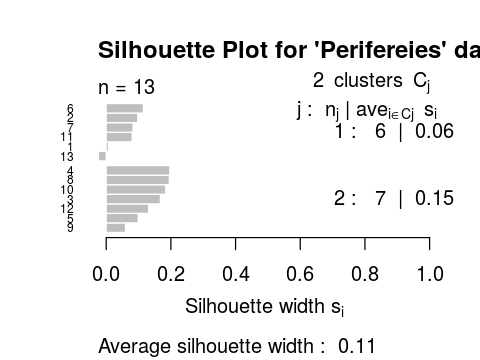

In [11]:
library(cluster)
sil<-silhouette(km$cluster,dist.data)
plot(sil,cex.names=0.6,nmax=98,main="Silhouette Plot for 'Perifereies' dataset, k=2")